In [18]:
import torch
import numpy as np
import torch.nn as nn
import matplotlib.pyplot as plt
import time
%matplotlib inline

### Prepare Data

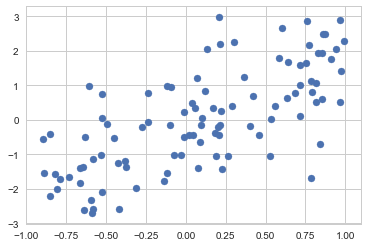

In [4]:
sample_size = 100
x = torch.FloatTensor(sample_size, 1).uniform_(-1, 1)
y = 2*x + torch.randn(x.size())

plt.scatter(x.data.numpy(), y.data.numpy())
plt.show()

### Linear Regression Model with nn

In [10]:
# parameter
input_size = 1
output_size = 1
epochs = 60
learning_rate = 0.05

In [12]:
# modeling
model = nn.Linear(input_size, output_size, bias=True)
print(model)
model.weight, model.bias

Linear(in_features=1, out_features=1, bias=True)


(Parameter containing:
 tensor([[-0.9478]]), Parameter containing:
 tensor([-0.9846]))

In [15]:
# Loss, optimizer
cost_func = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

### Train

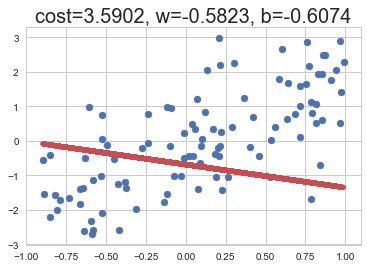

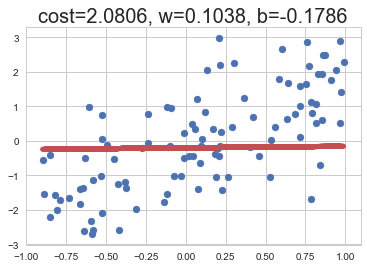

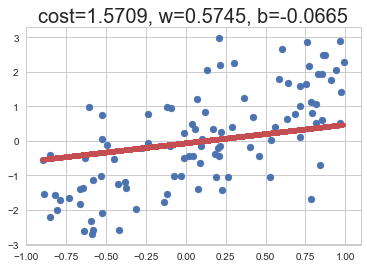

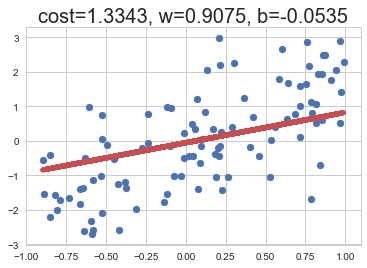

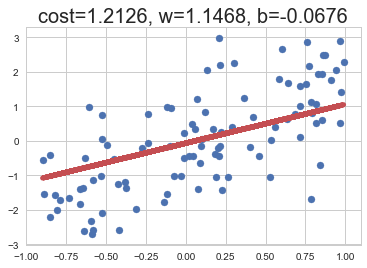

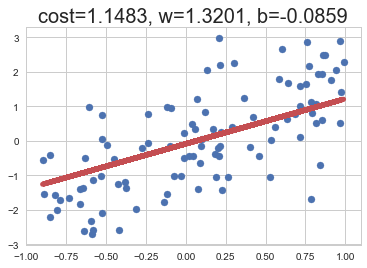

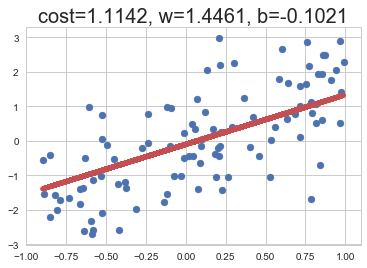

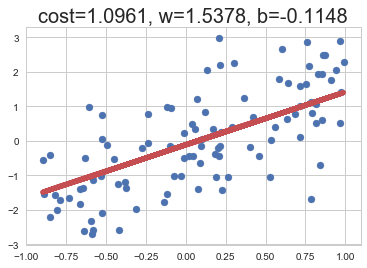

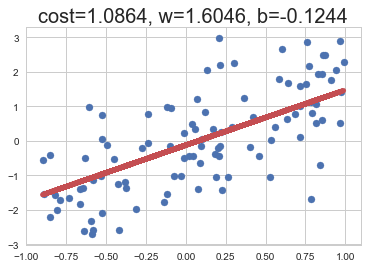

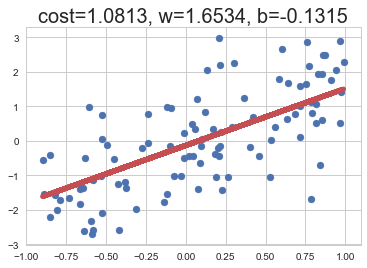

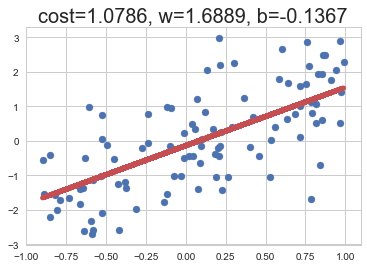

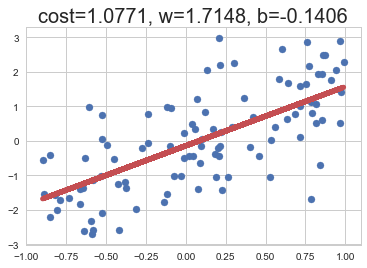

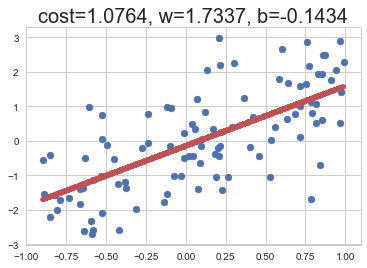

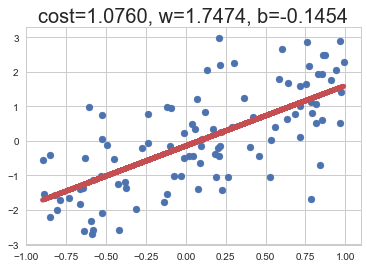

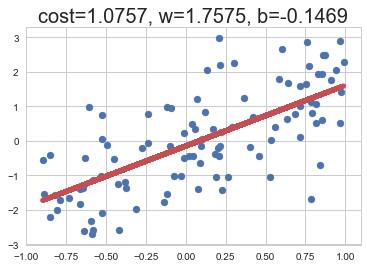

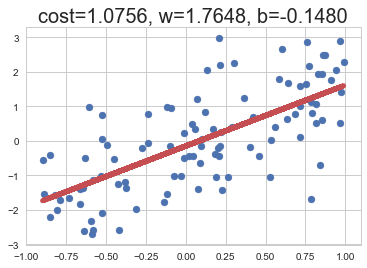

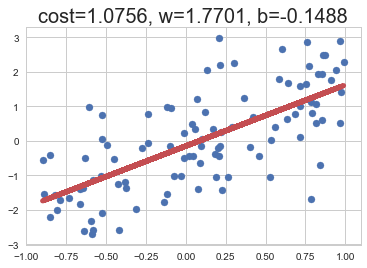

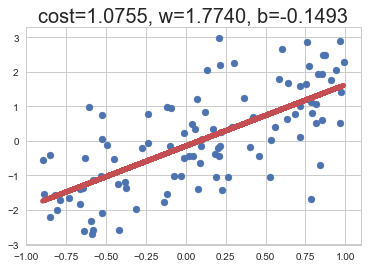

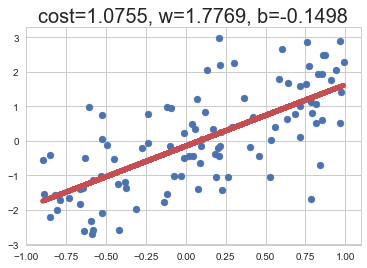

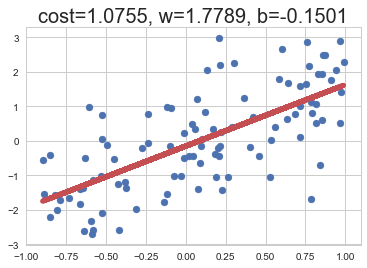

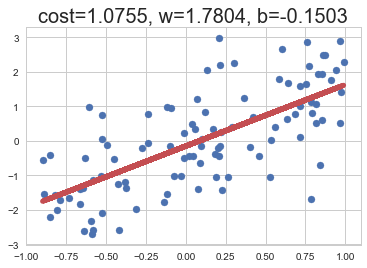

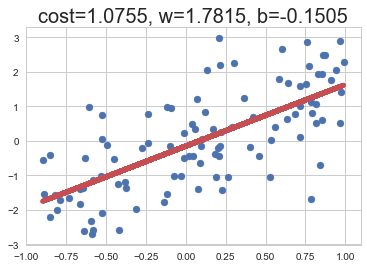

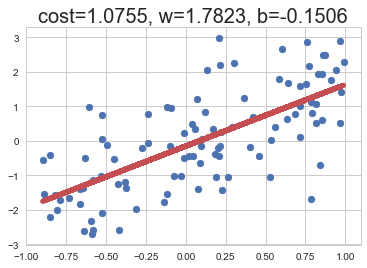

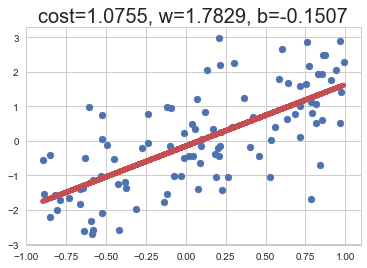

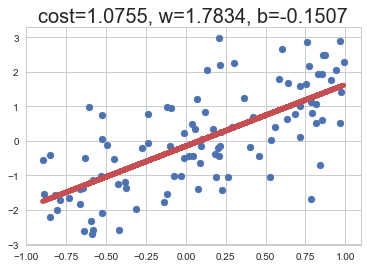

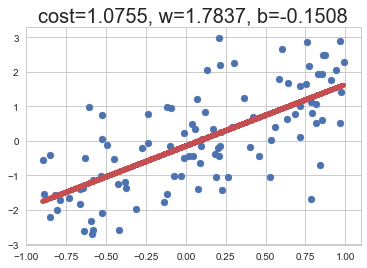

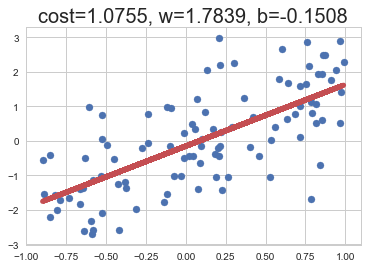

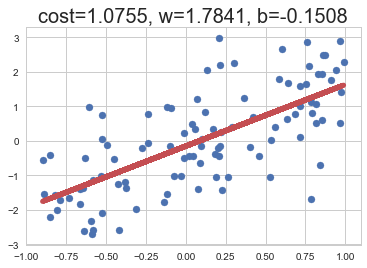

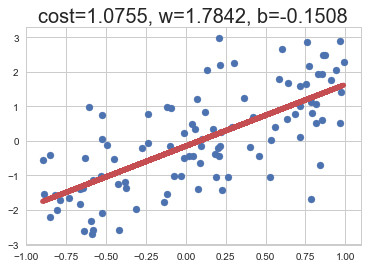

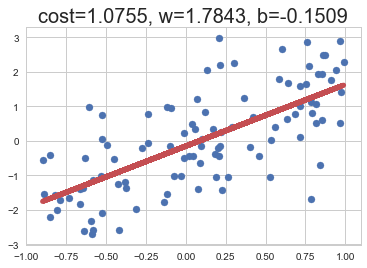

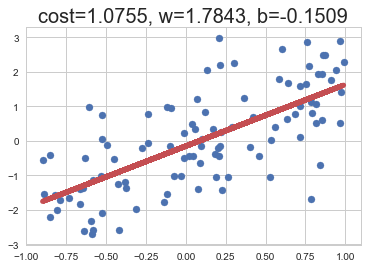

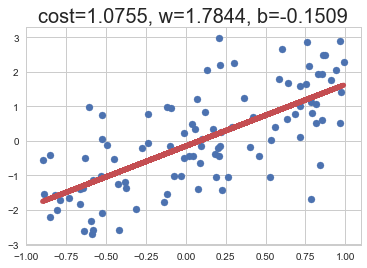

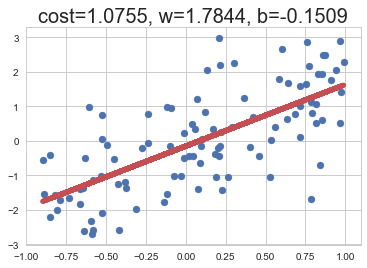

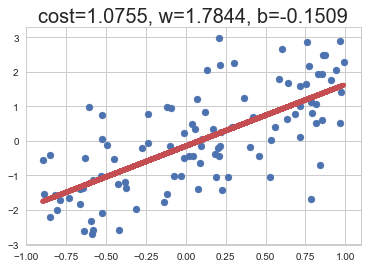

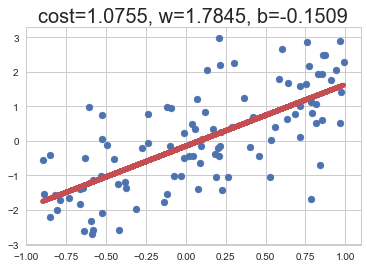

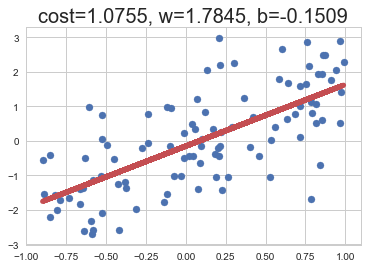

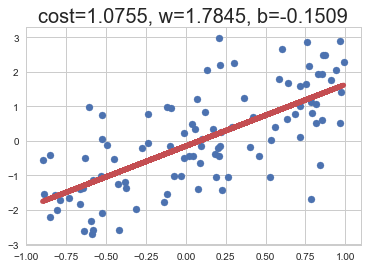

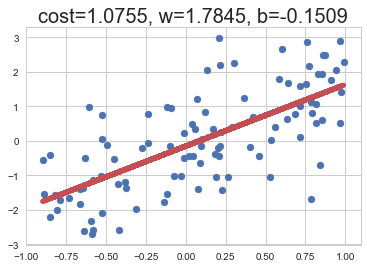

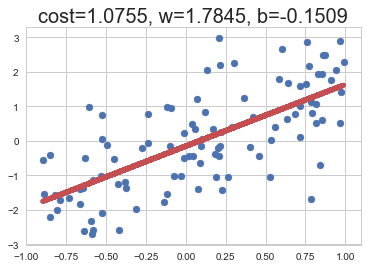

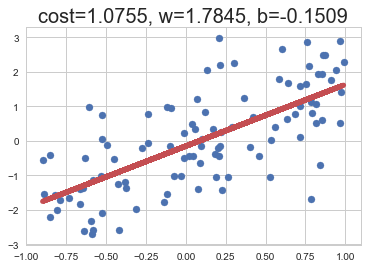

Linear Model Optimization is Done!


In [21]:
# Train model
max_epoch = 400

for step in range(max_epoch):
    
    prediction = model(x)               # input x and predict based on x
    cost = cost_func(prediction, y)     # must be (1. prediction, 2. training target y)
    
    optimizer.zero_grad()               # clear gradients for next traing
    cost.backward()                     # compute gradient value of parameters
    optimizer.step()                    # update gradients !!

    #print ('dL/dw: ', model.weight.grad) 
    #print ('dL/db: ', model.bias.grad)
    
    if step % 10 == 0:
        # plot and show learning process
        plt.cla()
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)
        plt.title('cost=%.4f, w=%.4f, b=%.4f' % (cost.item(), model.weight.item(),model.bias.item()), fontdict={'size': 20} )
        plt.show()
        
print('Linear Model Optimization is Done!')

In [17]:
model.state_dict()

OrderedDict([('weight', tensor([[-0.8502]])), ('bias', tensor([-0.8734]))])

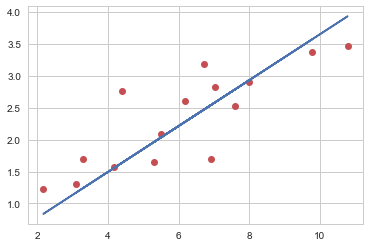

In [15]:
plt.plot(x_train, y_train, 'ro', label='Original data')
plt.plot(x_train, pred, label = 'Fitted line')